# Código Simulação de dados Oxímetro ( - )

Conexão com o banco de dados realizada com sucesso
oximetria: 96.5, heartRate: 54, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 95.1, heartRate: 77, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 93.8, heartRate: 70, diag: HIPOXIA LEVE
Dados inseridos com sucesso no banco de dados
oximetria: 92.3, heartRate: 79, diag: HIPOXIA LEVE
Dados inseridos com sucesso no banco de dados
oximetria: 97.4, heartRate: 87, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 93.1, heartRate: 82, diag: HIPOXIA LEVE
Dados inseridos com sucesso no banco de dados
oximetria: 94.1, heartRate: 85, diag: HIPOXIA LEVE
Dados inseridos com sucesso no banco de dados
oximetria: 100.6, heartRate: 85, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximetria: 93.3, heartRate: 102, diag: HIPOXIA LEVE
Dados inseridos com sucesso no banco de dados
oximetria: 95.3, heartRate: 100, diag: NORMAL
Dados inseridos com sucesso no banco de dados
oximet

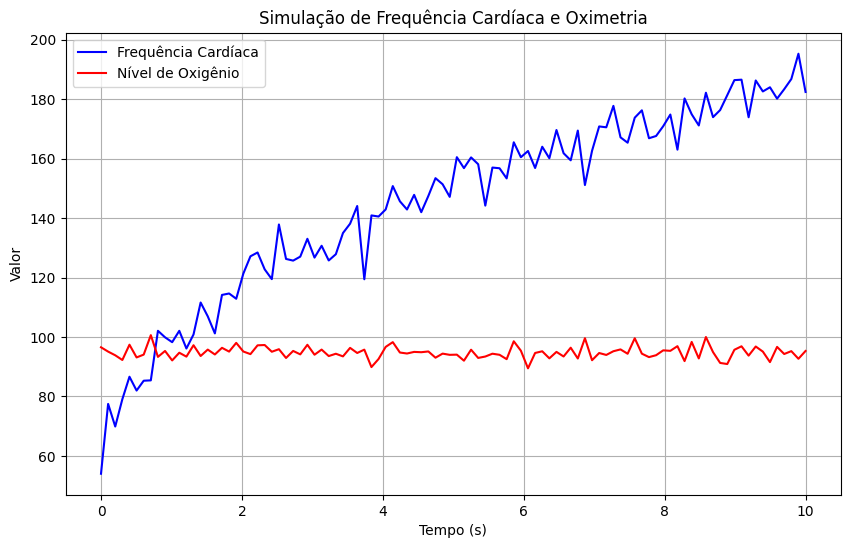

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
import mysql.connector

def connect_database():
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user ="user",
            password="senha",
            database="oximetro"
        )
        print("Conexão com o banco de dados realizada com sucesso")
        return connection
    except mysql.connector.Error as error:
        print("Erro ao conectar com o banco de dados {}".format(error))


def insert_data(connection, time_point, heart_rate, oxygen_lvl, diagnosis):
    try:
        cursor = connection.cursor()
        sql_query = "INSERT INTO sensor_data (time_point, heart_rate, oxygen_levels, diagnosis) VALUES (%s, %s, %s, %s)"
        data_values = (time_point, heart_rate, oxygen_lvl, diagnosis)
        cursor.execute(sql_query, data_values)
        connection.commit()
        print("Dados inseridos com sucesso no banco de dados")
    except mysql.connector.Error as error:
        print("Erro ao inserir dados no banco de dados:{}".format(error))




def generate_data():
    time_points = np.linspace(0, 10, 100)  # Tempo de simulação de 0 a 10 segundos
    heart_rate = 60 + 40 * np.sqrt(time_points) + np.random.normal(0, 5, size=len(time_points))
    oxygen_levels = 95 + np.random.normal(0, 2, size=len(time_points))
    return time_points, heart_rate, oxygen_levels

def simulate_sensor(connection):
    time_points, heart_rate, oxygen_levels = generate_data()
    for t, hr, ox in zip(time_points, heart_rate, oxygen_levels):
        diag = "NORMAL"  # Inicialmente assume que está normal
        if ox < 95:
            if ox < 91:
                diag = "HIPOXIA MODERADA"
            else:
                diag = "HIPOXIA LEVE"
        elif ox < 80:
            diag = "HIPOXIA SEVERA"

        print(f"oximetria: {ox:.1f}, heartRate: {hr:.0f}, diag: {diag}")

        insert_data(connection, t, hr, ox, diag)

        time.sleep(0.1)  # Simula um atraso de leitura do sensor


    # Plotar gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, heart_rate, label='Frequência Cardíaca', color='blue')
    plt.plot(time_points, oxygen_levels, label='Nível de Oxigênio', color='red')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Valor')
    plt.title('Simulação de Frequência Cardíaca e Oximetria')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    connection = connect_database()
    if connection:
        simulate_sensor(connection)
        connection.close()



In [6]:
time_points = np.linspace(0, 10, 100) # Tempo de simulação de 0 a 10 segundos
print(time_points)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8